# Oil Futures

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Read in data

In [3]:
df = pd.read_csv(
    Path("../Resources/oil_futures.csv"), parse_dates=True, index_col="Date"
)

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


<AxesSubplot:xlabel='Date'>

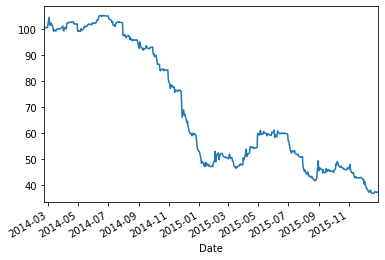

In [4]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

# Calculate returns

<AxesSubplot:xlabel='Date'>

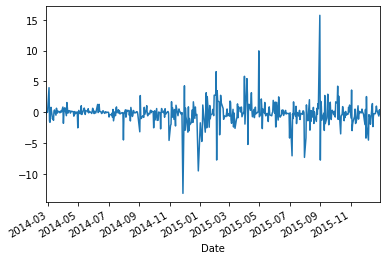

In [26]:
# Create a column of the settle price returns
returns = df.Settle.pct_change() * 100
returns.plot()

In [27]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns

df['Return'] = returns.copy()
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Return
Date,,,,,,,,,,
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933
2014-03-03,104.69,104.69,104.69,104.69,2.33,104.69,760.0,11171.0,0.009933,3.982916
2014-03-04,103.19,103.19,103.19,103.19,1.50,103.19,221.0,11200.0,3.982916,-1.432802


In [28]:
# Set the Dependent variable y to the `Return`
y = df['Return']

# Prepapre the Features (X) and the Target (y)

In [29]:
# Select the `Lagged_Return` and assign the DataFrame to X
X = df["Lagged_Return"].to_frame()
#X = df.index.values.reshape(-1,1)
print (f"X has {X.shape[0]}rows and {X.shape[1]} column of data.")
X.head()

X has 459rows and 1 column of data.


,Lagged_Return
Date,
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863
2014-03-03,0.009933
2014-03-04,3.982916


In [30]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
#X =X.shift().dropna()
X['Week_of_Year'] = X.index.weekofyear
X.head()

,Lagged_Return,Week_of_Year
Date,,
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9
2014-03-03,0.009933,10
2014-03-04,3.982916,10


### Get dummy variables for week and year

In [31]:
# Get a dummy variable for each week of the year
X_binary_encoded = pd.get_dummies(X,  columns=['Week_of_Year'])
X_binary_encoded.head()

,Lagged_Return,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52,Week_of_Year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-26,-0.198472,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,0.119320,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,-0.019863,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-03-03,0.009933,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-04,3.982916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
 X_binary_encoded.shape



(459, 53)

In [33]:
X_binary_encoded = X_binary_encoded.drop('Lagged_Return', axis=1)
X_binary_encoded.head()

,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,...,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52,Week_of_Year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-26,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2014-03-03,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-03-04,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Linear Regresion model

In [34]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()

In [35]:
# Create predictions using the trained model and the `X_binary_encoded` data
model.fit(X_binary_encoded, y)

# List the first 10 predictions
SSpredictions = model.predict(X_binary_encoded)
SSpredictions[:10]

array([-0.1328125 , -0.1328125 , -0.1328125 ,  0.25390625,  0.25390625,
        0.25390625,  0.25390625,  0.25390625, -0.8203125 , -0.8203125 ])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score




In [37]:
# Calculate r2_score (r-squared)
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, SSpredictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.12069262719833673, r2: 0.12069262719833673


In [38]:
mse = mean_squared_error(y, SSpredictions)
mse

3.29794716147079

In [39]:
rmse = np.sqrt(mse)
rmse

1.8160250993504439

In [40]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
mse = mean_squared_error(y, SSpredictions)
mse

3.29794716147079

In [41]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse)

In [42]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2 ): 0.12069262719833673
Mean Squared Error (MSE): 3.29794716147079
Root Mean Squared Error (RMSE): 1.8160250993504439
Standard Deviation of Futures Return: 1.9366515568629765
